In [7]:
%pylab inline
import io
import subprocess
import pathlib

Populating the interactive namespace from numpy and matplotlib


In [8]:
from plotting import svg2lines as s2l

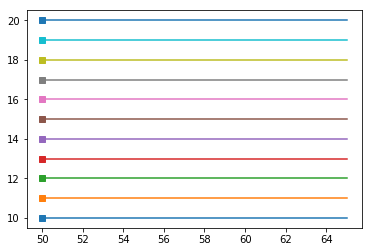

In [71]:
paths=[]
for y in linspace(10,20,num=11):
    p = s2l.Path([50,65], [y,y], None, None)
    paths.append(p)
coll=s2l.PathCollection(paths)

for p in coll.paths:
    plot(p.x,p.y,'s-',markevery=[0])

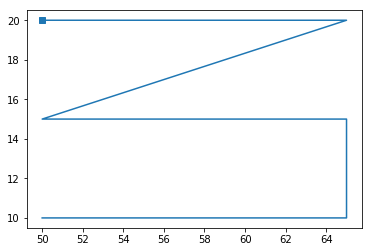

In [53]:
PATH_DIRECTION_FORWARD, PATH_DIRECTION_REVERSED = 1, 2
distance_threshold = 20
pool = coll.paths[::]
while True:
    merged_at_least_one = False
    for p in pool:
        min_dst = float('+inf')
        min_path = None
        min_direction = None
        # Also flip p too, check if that helps:
        # Four possible combinations: p+q, p + r(q), r(p) + q, r(p) + r(q)
        for q in (_ for _ in pool if _ is not p):
            dst_normal = np.hypot(*np.subtract(q.start(), p.end()))
            dst_revers = np.hypot(*np.subtract(q.end(), p.end()))
            if (dst_normal < dst_revers) and (dst_normal < min_dst):
                min_dst = dst_normal
                min_path = q
                min_direction = PATH_DIRECTION_FORWARD
            elif (dst_revers < dst_normal) and (dst_revers < min_dst):
                min_dst = dst_revers
                min_path = q
                min_direction = PATH_DIRECTION_REVERSED
        if min_dst<distance_threshold and min_path is not None:
            if min_direction==PATH_DIRECTION_FORWARD:
                extension = min_path
            else:
                extension = s2l.reversed_path(min_path)
            pool.append(p.append(extension))
            pool.remove(p)
            pool.remove(min_path)
            merged_at_least_one = True
            break
    if not merged_at_least_one:
        break

for p in pool:
    plot(p.x,p.y,'s-',markevery=[0])

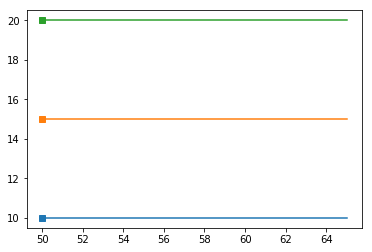

In [65]:
for p in coll.paths:
    plot(p.x,p.y,'s-',markevery=[0])

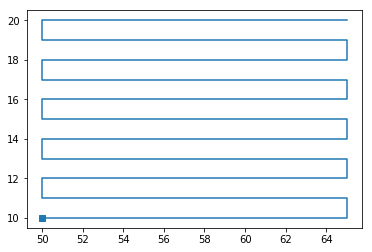

In [72]:
def make_candidate(p,q, q_orig):
    dst = np.hypot(*np.subtract(p.end(),q.start()))
    return dst, p, q, q_orig
    

PATH_DIRECTION_FORWARD, PATH_DIRECTION_REVERSED = 1, 2
distance_threshold = 20
pool = coll.paths[::]
while True:
    merged_at_least_one = False
    for p in pool:
        # Also flip p too, check if that helps:
        # Four possible combinations: p+q, p + r(q), r(p) + q, r(p) + r(q)
        
        min_dst = float('+inf')
        min_p = None
        min_q = None
        min_q_orig = None
        
        for q in [_ for _ in pool if _ is not p]:
            
            r = s2l.reversed_path
            
            candidates = [
                make_candidate(p,q,q),
                make_candidate(p,r(q),q),
                make_candidate(r(p),q,q),
                make_candidate(r(p),r(q),q)
            ]
            
            dst, cp, cq, cq_orig = min(candidates, key=lambda c:c[0])
            if dst < min_dst:
                min_dst = dst
                min_p = cp
                min_q = cq
                min_q_orig = cq_orig
        if min_dst<distance_threshold and min_q is not None:
            pool.remove(p)
            pool.remove(min_q_orig)
            pool.append(min_p.append(min_q))
            merged_at_least_one = True
            break
    if not merged_at_least_one:
        break

for p in pool:
    plot(p.x,p.y,'s-',markevery=[0])